In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

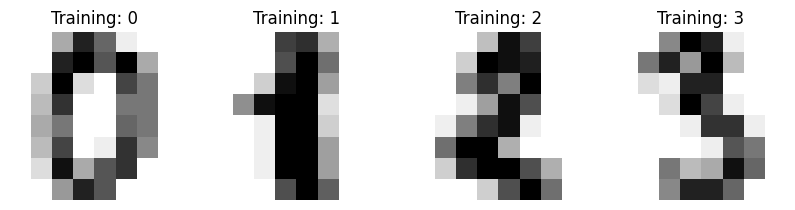

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
digits.images[1].reshape(-1)

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # crush each of the images

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
len(digits.target)

1797

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


In [ ]:
from sklearn.linear_model import LogisticRegression


LG = LogisticRegression(max_iter=10000)
LG.fit(X_train, y_train)


LG_pred = LG.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {LG}:\n"
    f"{metrics.classification_report(y_test, LG_pred)}\n"
)


Classification report for classifier LogisticRegression(max_iter=10000):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.93      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.93      0.90        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, LG_pred)
print(cf_matrix)

[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


<Axes: >

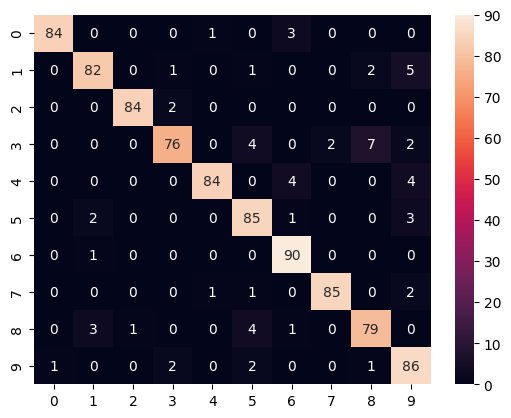

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)



In [ ]:
print(
    f"Classification report for classifier {LG}:\n"
    f"{metrics.classification_report(y_test, clf_pred)}\n"
)




Classification report for classifier LogisticRegression(max_iter=10000):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        88
           1       0.72      0.60      0.66        91
           2       0.86      0.76      0.80        86
           3       0.80      0.81      0.81        91
           4       0.80      0.68      0.74        92
           5       0.76      0.89      0.82        91
           6       0.96      0.93      0.94        91
           7       0.72      0.80      0.76        89
           8       0.75      0.76      0.76        88
           9       0.64      0.73      0.68        92

    accuracy                           0.79       899
   macro avg       0.79      0.79      0.79       899
weighted avg       0.79      0.79      0.79       899




In [ ]:
cf_matrix = confusion_matrix(y_test, LG_pred)
print(cf_matrix)

[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


<Axes: >

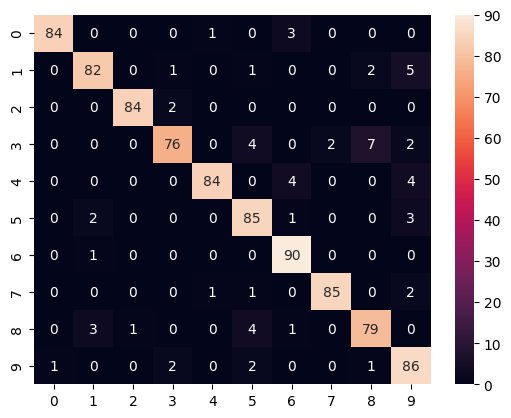

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

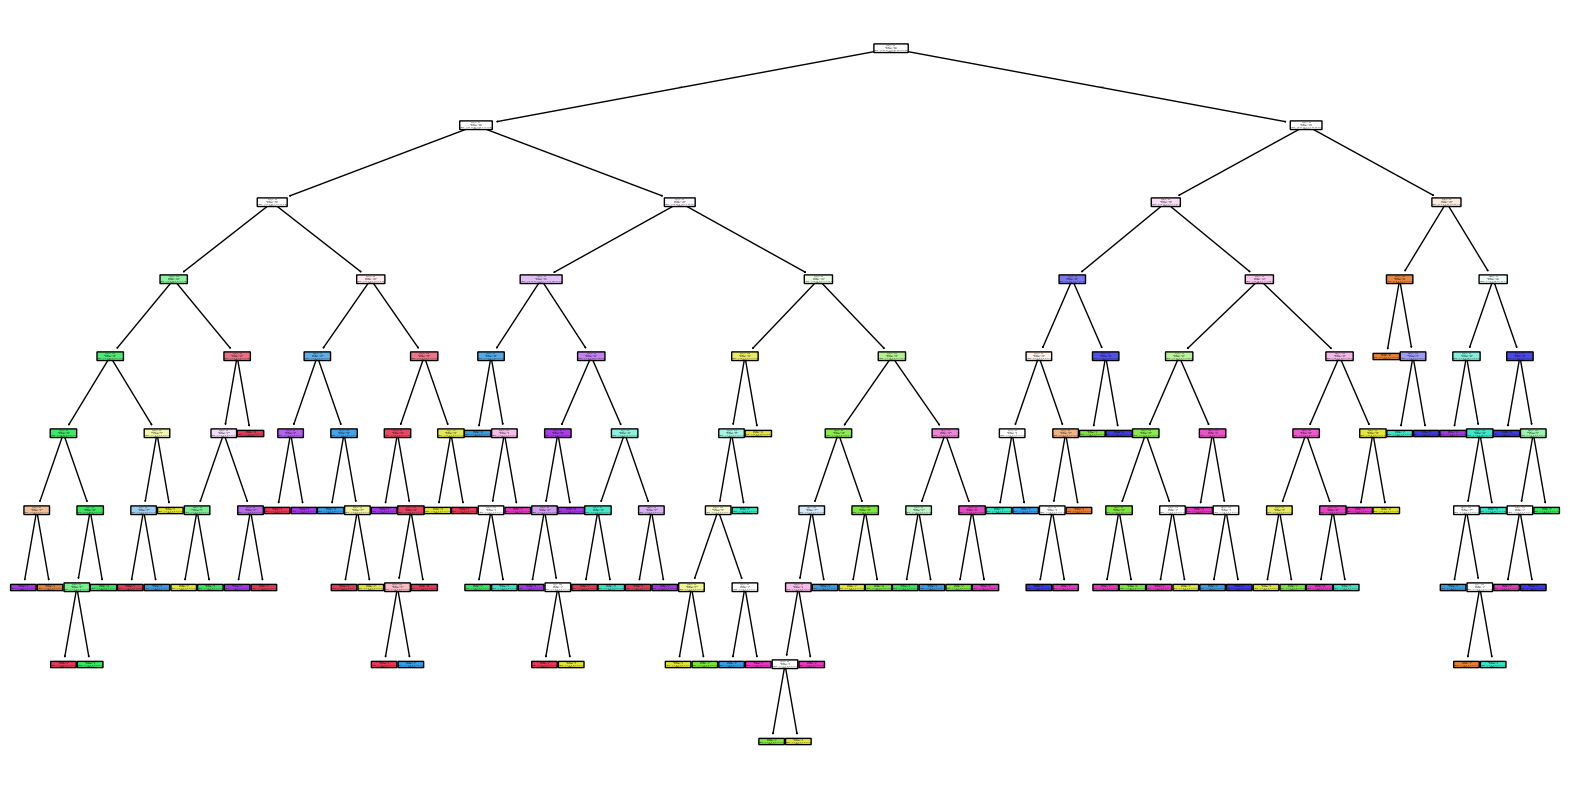

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Adjust the size according to the depth of the tree
plot_tree(clf,
          filled=True,   # If you use pandas
          class_names=clf.classes_.astype(str),  # Optional
          rounded=True)
plt.show()
